In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense,Input

In [12]:
data = pd.read_csv('/content/TCS1.CSV')

print(data.head())

print(data.isnull().sum())

numeric_data = data.select_dtypes(include=[np.number])
print(np.isinf(numeric_data).sum())

         Date        Open        High         Low       Close  Adj Close  \
0  2004-08-27  122.800003  122.800003  119.820000  120.332497  88.088272   
1  2004-08-30  121.237503  123.750000  120.625000  123.345001  90.293549   
2  2004-08-31  123.312500  123.750000  122.000000  123.512497  90.416122   
3  2004-09-01  123.750000  124.375000  122.949997  123.487503  90.397820   
4  2004-09-02  123.737503  125.574997  123.250000  124.207497  90.924896   

       Volume  
0  30646000.0  
1  24465208.0  
2  21194656.0  
3  19935544.0  
4  21356352.0  
Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [13]:
close_data = data['Close'].values.reshape(-1, 1)

close_data = np.nan_to_num(close_data, nan=0.0, posinf=0.0, neginf=0.0)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First input sequence:\n", X[0])
print("First output value:\n", y[0])

Shape of X: (4434, 60, 1)
Shape of y: (4434,)
First input sequence:
 [[0.02993979]
 [0.03068933]
 [0.030731  ]
 [0.03072478]
 [0.03090392]
 [0.03103455]
 [0.03094124]
 [0.03096426]
 [0.03090517]
 [0.03047784]
 [0.03075277]
 [0.03120996]
 [0.03158815]
 [0.03129082]
 [0.03136422]
 [0.03186308]
 [0.03181332]
 [0.03252554]
 [0.03272023]
 [0.03204222]
 [0.03199682]
 [0.03174676]
 [0.03158504]
 [0.03206524]
 [0.03194394]
 [0.03258463]
 [0.03348034]
 [0.03361096]
 [0.03363895]
 [0.03412102]
 [0.03415088]
 [0.03387843]
 [0.0337279 ]
 [0.        ]
 [0.03471505]
 [0.03501984]
 [0.03537004]
 [0.03555478]
 [0.03524564]
 [0.03500616]
 [0.03500616]
 [0.03475113]
 [0.03536817]
 [0.03545215]
 [0.03626264]
 [0.03596096]
 [0.03640882]
 [0.03606795]
 [0.03655002]
 [0.03640073]
 [0.03624709]
 [0.03682868]
 [0.03696055]
 [0.03714591]
 [0.03720501]
 [0.03722056]
 [0.03722056]
 [0.03703831]
 [0.03748927]
 [0.03828546]]
First output value:
 0.03785315320642648


In [14]:
model = Sequential()
model.add(Input(shape=(X.shape[1],1)))
model.add(LSTM(50, return_sequences=True,))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0208
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 2.7284e-04
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 2.8548e-04
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2.8020e-04
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 2.3607e-04
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 2.6738e-04
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 2.8680e-04
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 3.1215e-04
Epoch 9/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 2.3014e-04
Epoch 10/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 2.1785e-04


139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


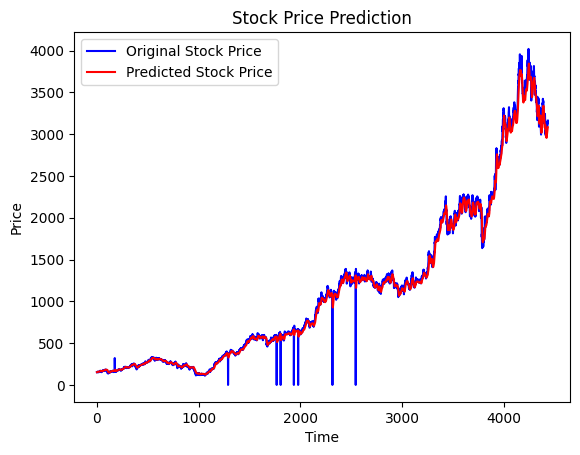

In [16]:
predicted_stock_price = model.predict(X)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

original_stock_price = scaler.inverse_transform(y.reshape(-1, 1))


plt.plot(original_stock_price, color='blue', label='Original Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

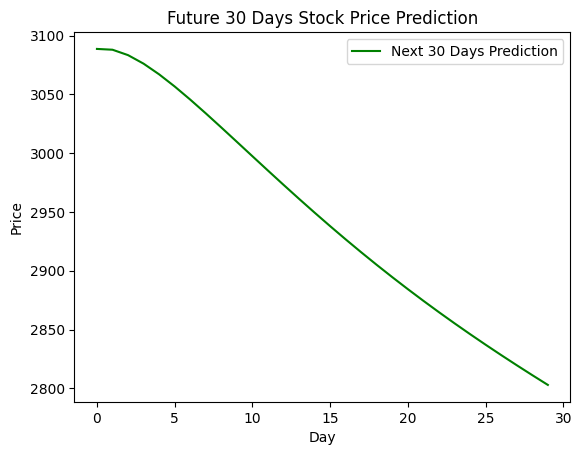

In [17]:
future_input = scaled_data[-time_step:].reshape(1, time_step, 1)
future_predictions = []

for _ in range(30):
    pred = model.predict(future_input)[0][0]
    future_predictions.append(pred)

    future_input = np.append(future_input[:, 1:, :], [[[pred]]], axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

plt.plot(future_predictions, color='green', label='Next 30 Days Prediction')
plt.title('Future 30 Days Stock Price Prediction')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()